## Описание задачи
Задача состоит в том ,чтобы определить диапазон цен на основе таких параметров как: бренда, модели, года выпуска, цвета и т.д.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

## 1. Загрузка данных


In [4]:
dataset = pd.read_csv('./USA_cars_datasets.csv')
dataset.shape

(2499, 13)

Датасет содержит данные о 2499 моделей машин с описанием 13 параметров

In [5]:
dataset.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [6]:
dataset.drop(['Unnamed: 0','vin', 'lot', 'condition'], axis=1, inplace=True)
dataset.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'state', 'country'],
      dtype='object')

Признаки:

1. Price - цена машин
2. Brand - бренд машины
3. Model - модель
4. Year - год выпуска
5. title_status - показывает статус машины (clean vehicle - нет аварий, salvage insurance - были аварии)
6. mileage - пробег
7. color - цвет машины
8. vin - это идентификационной номер автомобиля или другого транспортного средства, состоит из 17 символов
9. lot - это идентификационный номер, присвоенный определенному количеству или партии материала от одного производителя.
10. state - штат
11. country - страна
12. condition - статус

Добавим бинарный признак `threshold_price` чтобы разделить машины по двум классам. Дороже или дешевле 42450

In [34]:
dataset['binary_price'] = np.where(dataset['price'] >= 42450, 1, 0)
dataset['binary_price'].value_counts()

binary_price
0    2375
1     124
Name: count, dtype: int64

Столбцы `brand`, `country` и `title_status` содержат категориальные значения, заменим на специальный тип

In [8]:
dataset['brand'] = dataset['brand'].astype('category')
dataset['brand'].dtype

CategoricalDtype(categories=['acura', 'audi', 'bmw', 'buick', 'cadillac', 'chevrolet',
                  'chrysler', 'dodge', 'ford', 'gmc', 'harley-davidson',
                  'heartland', 'honda', 'hyundai', 'infiniti', 'jaguar',
                  'jeep', 'kia', 'land', 'lexus', 'lincoln', 'maserati',
                  'mazda', 'mercedes-benz', 'nissan', 'peterbilt', 'ram',
                  'toyota'],
, ordered=False, categories_dtype=object)

In [9]:
dataset['title_status'] = dataset['title_status'].astype('category')
dataset['title_status'].dtype

CategoricalDtype(categories=['clean vehicle', 'salvage insurance'], ordered=False, categories_dtype=object)

In [10]:
dataset['country'] = dataset['country'].astype('category')
dataset['country'].dtype

CategoricalDtype(categories=[' canada', ' usa'], ordered=False, categories_dtype=object)

In [11]:
dataset['model'] = dataset['model'].astype('category')
dataset['model'].dtype

CategoricalDtype(categories=['1500', '2500', '2500hd', '300', '3500', '5', 'acadia',
                  'altima', 'armada', 'bus',
                  ...
                  'van', 'vans', 'vehicl', 'versa', 'volt', 'wagon', 'x3',
                  'xd', 'xt5', 'xterra'],
, ordered=False, categories_dtype=object)

In [12]:
dataset['color'] = dataset['color'].astype('category')
dataset['color'].dtype

CategoricalDtype(categories=['beige', 'billet silver metallic clearcoat', 'black',
                  'black clearcoat', 'blue', 'bright white clearcoat', 'brown',
                  'burgundy', 'cayenne red', 'charcoal', 'color:',
                  'competition orange', 'dark blue', 'glacier white', 'gold',
                  'gray', 'green', 'guard', 'ingot silver',
                  'ingot silver metallic', 'jazz blue pearlcoat',
                  'kona blue metallic', 'light blue', 'lightning blue',
                  'magnetic metallic', 'maroon', 'morningsky blue', 'no_color',
                  'off-white', 'orange', 'oxford white', 'pearl white',
                  'phantom black', 'purple', 'red',
                  'royal crimson metallic tinted clearcoat', 'ruby red',
                  'ruby red metallic tinted clearcoat', 'shadow black',
                  'silver', 'super black', 'tan', 'toreador red',
                  'triple yellow tri-coat', 'turquoise',
                  'tux

In [13]:
dataset['state'] = dataset['state'].astype('category')
dataset['state'].dtype

CategoricalDtype(categories=['alabama', 'arizona', 'arkansas', 'california', 'colorado',
                  'connecticut', 'florida', 'georgia', 'idaho', 'illinois',
                  'indiana', 'kansas', 'kentucky', 'louisiana', 'maryland',
                  'massachusetts', 'michigan', 'minnesota', 'mississippi',
                  'missouri', 'montana', 'nebraska', 'nevada', 'new hampshire',
                  'new jersey', 'new mexico', 'new york', 'north carolina',
                  'ohio', 'oklahoma', 'ontario', 'oregon', 'pennsylvania',
                  'rhode island', 'south carolina', 'tennessee', 'texas',
                  'utah', 'vermont', 'virginia', 'washington', 'west virginia',
                  'wisconsin', 'wyoming'],
, ordered=False, categories_dtype=object)


## 2. Визуализация и описательная статистика

Информация о числовых признакаx:

In [14]:
dataset.describe()

,price,year,mileage,binary_price
count,2499.000000,2499.000000,2.499000e+03,2499.000000
mean,18767.671469,2016.714286,5.229869e+04,0.049620
std,12116.094936,3.442656,5.970552e+04,0.217202
min,0.000000,1973.000000,0.000000e+00,0.000000
25%,10200.000000,2016.000000,2.146650e+04,0.000000
50%,16900.000000,2018.000000,3.536500e+04,0.000000
75%,25555.500000,2019.000000,6.347250e+04,0.000000
max,84900.000000,2020.000000,1.017936e+06,1.000000


- min – минимальное значение признака
- max – максимальное значение признака
- mean – среднее значение
- std – среднеквадратическое отклонение
- 25% – первый квартиль – значение, ниже которого лежит 25% значений
- 50% – медиана – значение, 50% значений меньше которого, а другие 50% больше
- 75% – третий квартиль – значение, ниже которого лежит около 75% значений

Нет пропущенных значений.


Информация о категориях:

In [15]:
dataset.describe(include=['category'])

,brand,model,title_status,color,state,country
count,2499,2499,2499,2499,2499,2499
unique,28,127,2,49,44,2
top,ford,door,clean vehicle,white,pennsylvania,usa
freq,1235,651,2336,707,299,2492


- count - количество ненулевых значений
- unique - число уникальных категорий.
- top - наиболее часто встречающаяся категория.
- freq - частота появления самой популярной категории

Вычислим матрицу корреляции для количественных признаков и визуализируем её образ.

In [16]:
correlation_matrix = dataset.corr(numeric_only=True)
correlation_matrix

,price,year,mileage,binary_price
price,1.000000,0.418274,-0.400838,0.604254
year,0.418274,1.000000,-0.594686,0.101949
mileage,-0.400838,-0.594686,1.000000,-0.103166
binary_price,0.604254,0.101949,-0.103166,1.000000


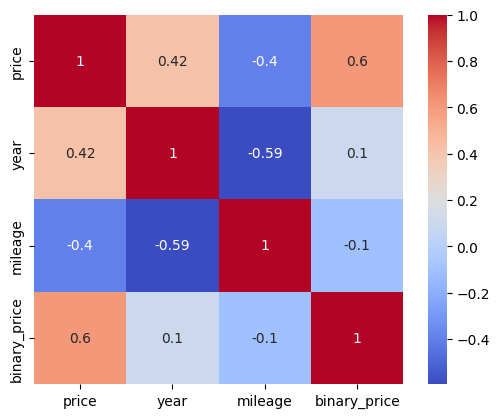

In [17]:
sns.heatmap(dataset.corr(numeric_only=True), annot=True, square=True, cmap='coolwarm')
pass

Цена умерено связана с возрастом машины и пробегом. Чем больше возраст и пробег тем дешевле машина. Пробег влияет на цену машины сильнее, чем ее возраст.

Диаграммы рассеивания:

/tmp/ipykernel_11507/2494290961.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


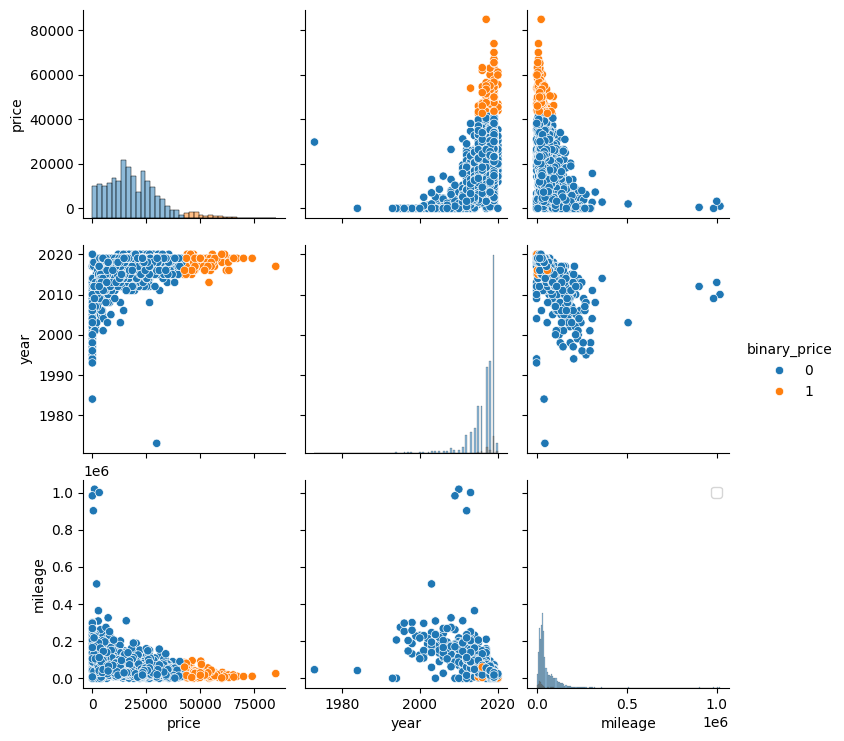

In [18]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(dataset.shape[0]), size=2498, replace=False)
sns.pairplot(dataset.iloc[random_subset], hue='binary_price', diag_kind='hist')
plt.legend()
pass

Новые и машины с небольшим пробегом наиболее дорогие


## 3. Заполнение пропущенных значений

Проверка пропущенных значений

In [19]:
dataset.isnull().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
state           0
country         0
binary_price    0
dtype: int64


## 4. Бинаризация номинальных признаков

In [20]:
categorical_columns = [i for i in dataset.columns if dataset[i].dtype == 'category']
numerical_columns = [i for i in dataset.columns if dataset[i].dtype != 'category']
print(categorical_columns)
print(numerical_columns)

['brand', 'model', 'title_status', 'color', 'state', 'country']
['price', 'year', 'mileage', 'binary_price']


In [21]:
binary_columns = [i for i in categorical_columns if len(dataset[i].unique()) == 2]
nonbinary_columns = [i for i in categorical_columns if len(dataset[i].unique()) > 2]
print(binary_columns, nonbinary_columns)

['title_status', 'country'] ['brand', 'model', 'color', 'state']


Бинарные признаки `color` и `title_status` заменим на числовые.

К небинарным признакам `model` и `brand` применим метод бинаризации с помощью функции get_dummies:

In [22]:
processed_dataset = dataset.loc[:, ['price', 'brand', 'model', 'year', 'title_status',
                        'mileage', 'color', 'country',
                        'binary_price']].copy()

# бинарные данные
#processed_dataset['title_status'] = pd.factorize(processed_dataset['title_status'])[0]
processed_dataset['country'] = pd.factorize(processed_dataset['country'])[0]

processed_dataset['color'] = pd.factorize(processed_dataset['color'])[0]

# не бинарные
title_dummies = pd.get_dummies(processed_dataset['title_status'])
model_dummies = pd.get_dummies(processed_dataset['model'])
brand_dummies = pd.get_dummies(processed_dataset['brand'])

processed_dataset = pd.concat((processed_dataset, title_dummies), axis=1)
processed_dataset = processed_dataset.drop(['title_status'], axis=1)
processed_dataset = pd.concat((processed_dataset, model_dummies), axis=1)
processed_dataset = processed_dataset.drop(['model'], axis=1)
processed_dataset = pd.concat((processed_dataset, brand_dummies), axis=1)
processed_dataset = processed_dataset.drop(['brand'], axis=1)

processed_dataset.head()

,price,year,mileage,color,country,binary_price,clean vehicle,salvage insurance,1500,2500,...,land,lexus,lincoln,maserati,mazda,mercedes-benz,nissan,peterbilt,ram,toyota
0,6300,2008,274117.0,0,0,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2899,2011,190552.0,1,0,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5350,2018,39590.0,1,0,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,25000,2014,64146.0,2,0,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,27700,2018,6654.0,3,0,0,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
processed_dataset.columns

Index(['price', 'year', 'mileage', 'color', 'country', 'binary_price',
       'clean vehicle', 'salvage insurance', '1500', '2500',
       ...
       'land', 'lexus', 'lincoln', 'maserati', 'mazda', 'mercedes-benz',
       'nissan', 'peterbilt', 'ram', 'toyota'],
      dtype='object', length=163)

## 5. Нормализация количественных признаков

In [24]:
processed_dataset = processed_dataset.astype(int)
data_norm = (processed_dataset - processed_dataset.min(axis=0)) / (processed_dataset.max(axis=0) - processed_dataset.min(axis=0))
data_norm.describe()

,price,year,mileage,color,country,binary_price,clean vehicle,salvage insurance,1500,2500,...,land,lexus,lincoln,maserati,mazda,mercedes-benz,nissan,peterbilt,ram,toyota
count,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,...,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000,2499.000000
mean,0.221056,0.930091,0.051377,0.080115,0.002801,0.049620,0.934774,0.065226,0.015606,0.003201,...,0.001601,0.000800,0.000800,0.000400,0.000800,0.004002,0.124850,0.001601,0.000400,0.000400
std,0.142710,0.073248,0.058654,0.110793,0.052862,0.217202,0.246974,0.246974,0.123971,0.056501,...,0.039984,0.028284,0.028284,0.020004,0.028284,0.063144,0.330615,0.039984,0.020004,0.020004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.120141,0.914894,0.021088,0.020833,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.199058,0.957447,0.034742,0.083333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.301007,0.978723,0.062354,0.104167,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6. Отбор признаков

Для предсказания стоимости автомобиля `binary_price` будем использовать все входные признаки кроме `price` и `binary_price`

In [25]:
X = data_norm.drop(['price', 'binary_price'], axis=1)
y = data_norm['binary_price']

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import train_test_split

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 42)
model = neighbors.KNeighborsClassifier(n_neighbors = 17)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

N_train, _ = X_train.shape
N_test, _ = X_test.shape
N_train, N_test

(1874, 625)

## 7. Классификатор ближайших соседей kNN

In [36]:
from sklearn import metrics
print(1 - metrics.accuracy_score(y_test, y_test_pred))
print(np.mean(y_test != y_test_pred))

0.043200000000000016
0.0432


In [37]:
k_range = range(1, 30)
err_train = []
err_test = []
for k in k_range:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

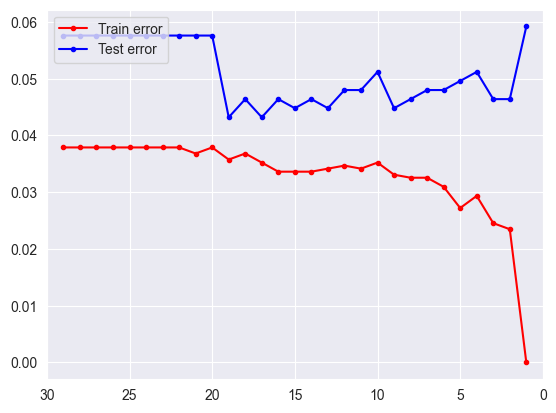

In [38]:
plt.plot(k_range, err_train, '.-r', label = 'Train error')
plt.plot(k_range, err_test,  '.-b', label = 'Test error')
plt.legend(loc = 2)
plt.xlim([30, 0])
pass

In [39]:
print(min(err_test))
print(err_train[k_range[err_test.index(min(err_test))]])
print(k_range[err_test.index(min(err_test))])

0.0432
0.0368196371398079
17


Получено оптимально число ближайших соседей - 17 c минимальным значением ошибки на тестовой выборке и соответствующем значением ошибки на обучающей выборке. Ввиду ненатренерованности модели ошибка на обучающей выборке ниже, чем на тестовой. При увеличении количества соседей ошибка на обучающей выборке ухудшается, но незначительно улучшается ошибка на тестовой до определенного числа соседей.

## 8. Случайный лес

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("error_train : {:.16f}, error_test: {:.16f} ".format(err_train, err_test))

error_train : 0.0000000000000000, error_test: 0.0448000000000000 


Алгоритм случайного леса оказался близок по точности с алгоритмом k-ближайших соседей при оптимальных параметрах каждого из методов на тестовой выборке, на обучающей значительно точнее. У тренировочной выборки ошибка мала и близка к нулю.

## 9 Выводы
В работе производился анализ данных о стоимости автомобилей и решение задачи классификации с помощью моделей, которые были натренированы методами k-ближайших соседей и случайного леса. В ходе работы проведены:
1. Вычисление основных статистических характеристик и их анализ
2. Нормализация количественных признаков (с помощью линейного преобразования к отрезку [0, 1])
3. Разбиение данных на обучающую и тестовую выборки
4. Выбор алгоритма классификации и проверка качества модели
5. Сравнение 2 моделей, алгоритм случайного леса оказался лучше метода к-ближайших соседе